<a href="https://colab.research.google.com/github/SouravPetal/Machine_learning/blob/main/Crops_yield_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop-Yield-Prediction System**

**Importing the libaries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Uploading the dataset**

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/ML LAB/crop_yield2.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#display the 5 rows of the dataset
data1.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739,794.0,2051.4,165500.63,539.09,0.420909


#    **About the dataset**
**1. Crop -** Name of the all crops.<br>
**2. Crop_Year -** Production year.<br>
**3. Season -** Production time of the particular crops.<br>
**4. State -** State of production<br>
**5. Area -** How much area occupied<br>
**6. Production -** Production of each crop<br>
**7. Annual_Rainfall -** Annual rainfall of each area<br>
**8. Fertilizer -** Uses of fertilizer<br>
**9. Pesticide -** Uses of pesticide<br>
**10. Yield -** Final yield of each crops<br>


In [ ]:
#display the numbers of rows and columns
data1.shape

(19689, 10)

In [ ]:
#shows numbers of columns,rows,column names and their data types,
#how much memory the dataframe using and the number of non-null values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19688 non-null  object 
 4   Area             19678 non-null  object 
 5   Production       19668 non-null  float64
 6   Annual_Rainfall  19658 non-null  float64
 7   Fertilizer       19667 non-null  float64
 8   Pesticide        19680 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
#provide a statistical summary of the numerical columns in the dataset
data1.describe()

,Crop_Year,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.966800e+04,19658.000000,1.966700e+04,1.968000e+04,19689.000000
mean,2009.110569,1.651069e+07,1441.944972,2.376845e+07,4.786647e+04,82.521546
std,6.508763,2.631993e+08,823.617362,8.823979e+07,1.810247e+05,882.534047
min,1997.000000,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.379000e+03,940.700000,1.873902e+05,3.546025e+02,0.597857
50%,2010.000000,1.380000e+04,1247.600000,1.237478e+06,2.421150e+03,1.028462
75%,2015.000000,1.227022e+05,1648.200000,9.968709e+06,1.997912e+04,2.384815
max,2020.000000,6.326000e+09,6552.700000,1.754789e+09,3.780111e+06,21105.000000


In [ ]:
#check the null value present or not
data1.isnull()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19684,False,False,False,False,False,False,False,False,False,False
19685,False,False,False,False,False,False,True,False,False,False
19686,False,False,False,False,False,False,False,False,False,False
19687,False,False,False,False,False,False,False,False,False,False


In [ ]:
#numbers of null values present in the dataset
data1.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,1
Area,11
Production,21
Annual_Rainfall,31
Fertilizer,22
Pesticide,9
Yield,0


In [ ]:
#drop the state column
#data = data.drop('State', axis=1)

In [ ]:
#convert the area into numeric
data1['Area'] = pd.to_numeric(data1['Area'], errors='coerce')

In [ ]:
# Assuming 'data' is your DataFrame
for col in data1.select_dtypes(include=['number']).columns:
    # Calculate the mean of the column, ignoring null values
    mean_val = data1[col].mean()

    # Fill null values in the column with the calculated mean
    data1[col].fillna(mean_val, inplace=True)

<ipython-input-70-08a25684039a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].fillna(mean_val, inplace=True)


In [ ]:
#SimpleImputer is a tool used to fill in missing values
from sklearn.impute import SimpleImputer
#assigning the most frequently used term
imputer = SimpleImputer(strategy='most_frequent')
# Reshape the output to be 1D before assigning to the column
data1['State'] = imputer.fit_transform(data1[['State']]).ravel()

In [ ]:
#check the null value present or not
data1.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
data1.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708.0,2051.4,7.024878e+06,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685.0,2051.4,6.316433e+05,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.00000,22.0,2051.4,7.575532e+04,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000.0,2051.4,1.870662e+06,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794.0,2051.4,1.655006e+05,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,176650.79003,9073.0,2051.4,2.376845e+07,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.00000,1507.0,2051.4,2.835114e+05,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.00000,904095.0,2051.4,8.995468e+06,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.00000,5158.0,2051.4,9.610267e+05,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.00000,14721.0,2051.4,1.828787e+06,5956.96,0.615652


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  float64
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


<ipython-input-75-ba3531480dab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=data1, palette = 'magma')


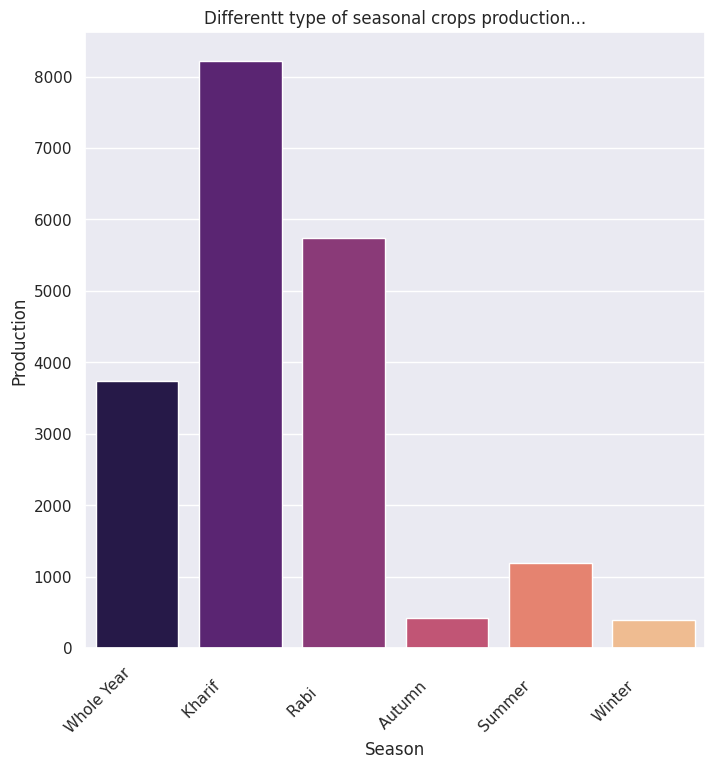

In [ ]:
sns.set()
plt.figure(figsize=(8,8))
# If 'Season' is categorical and you want to visualize its frequency:
sns.countplot(x='Season', data=data1, palette = 'magma')

plt.title('Differentt type of seasonal crops production...')
plt.xlabel("Season")
plt.ylabel("Production")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

<ipython-input-76-189b534c3f33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Annual_Rainfall'], kde=False, color = 'darkred')


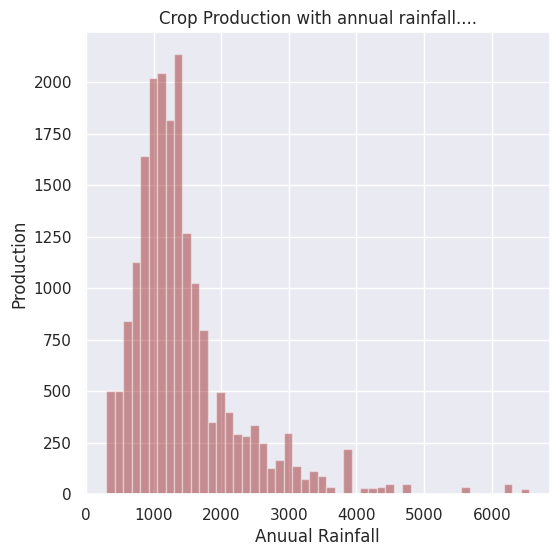

In [ ]:
plt.figure(figsize=(6,6))
# Remove the extra tab character from the column name
sns.distplot(data1['Annual_Rainfall'], kde=False, color = 'darkred')
plt.title('Crop Production with annual rainfall....')
plt.xlabel('Anuual Rainfall')
plt.ylabel('Production')
plt.show()

<ipython-input-77-b21ce09f9409>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'State', y = 'Annual_Rainfall', data =data1, palette = 'summer')


<Axes: xlabel='State', ylabel='Annual_Rainfall'>

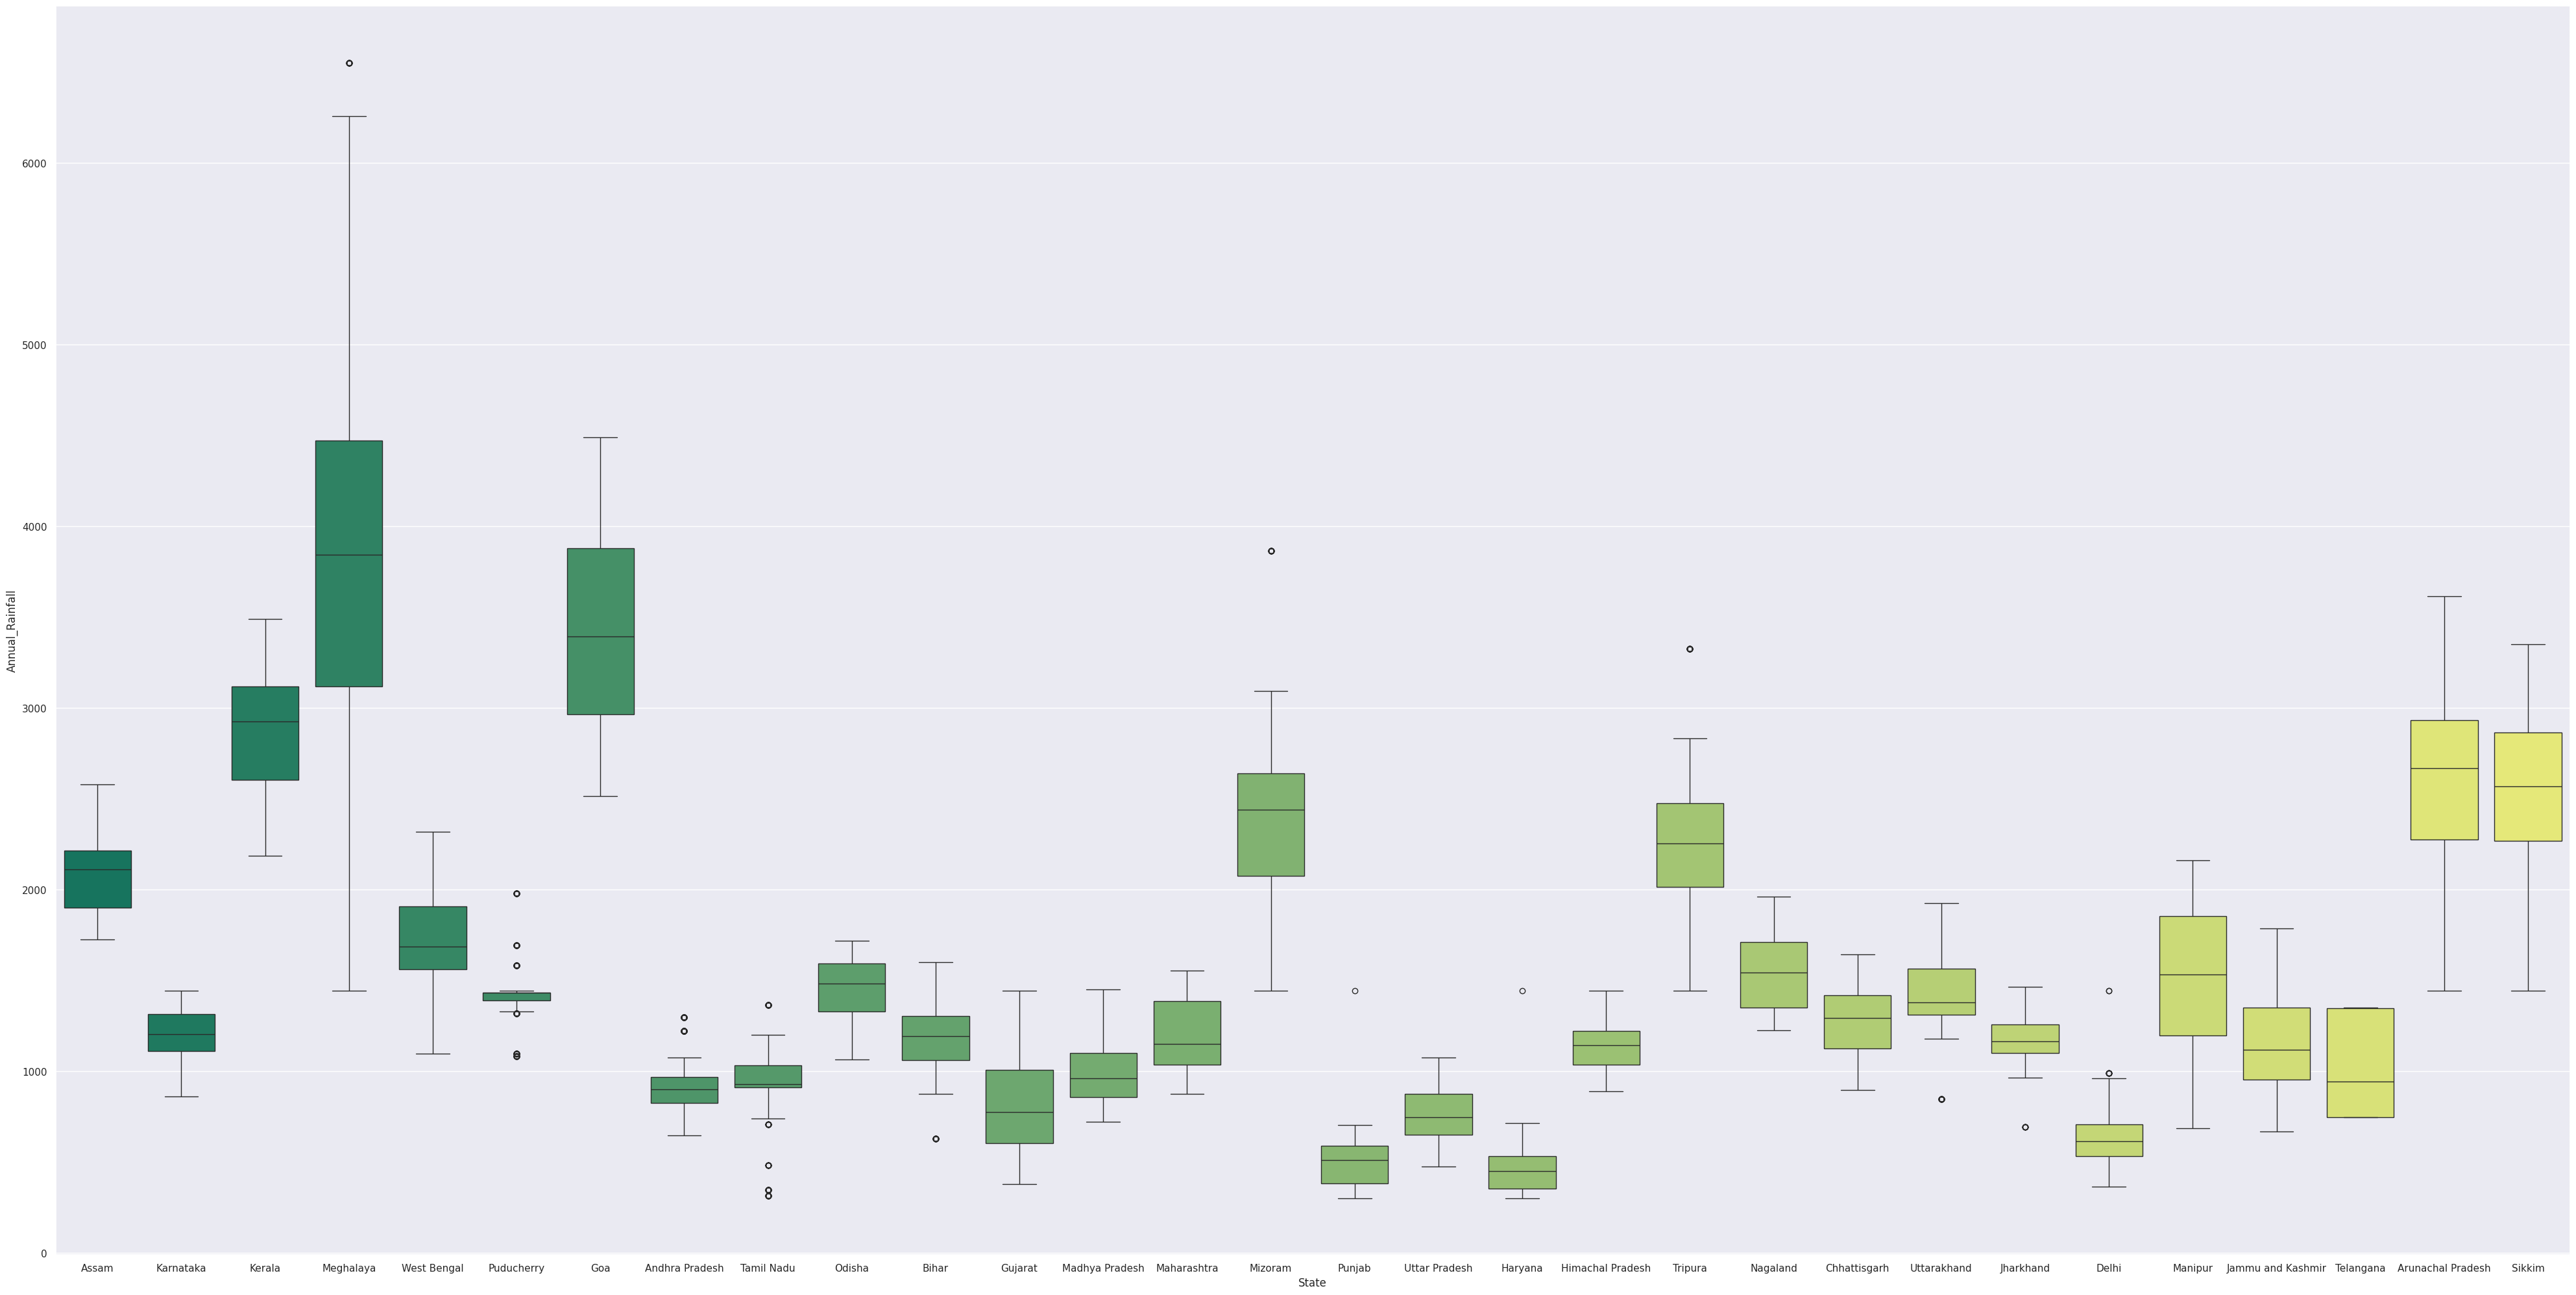

In [ ]:
plt.figure(figsize = (50, 25))
sns.boxplot(x = 'State', y = 'Annual_Rainfall', data =data1, palette = 'summer')

In [ ]:
# Encode categorical columns (Crop, Season, State)
categorical_columns = ['Crop', 'Season', 'State']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(data1[categorical_columns])
encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded columns with the rest of the dataset, and drop the original ones.
data1 = pd.concat([data1.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
#then check the null values present or not
data1.isnull().sum()

,0
Crop_Year,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
...,...
State_Telangana,0
State_Tripura,0
State_Uttar Pradesh,0
State_Uttarakhand,0


In [ ]:
data1.duplicated().sum()

72

In [ ]:
#drop the duplicate rows
data1=data1.drop_duplicates()
data1

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708.0,2051.400000,7024878.38,22882.34,0.796087,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997,6637.0,4685.0,2051.400000,631643.29,2057.47,0.710435,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997,796.0,22.0,2051.400000,75755.32,246.76,0.238333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997,19656.0,126905000.0,2051.400000,1870661.52,6093.36,5238.051739,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,1739.0,794.0,2051.400000,165500.63,539.09,0.420909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,1998,4000.0,2000.0,1498.000000,395200.00,1160.00,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19685,1998,1000.0,3000.0,1441.944972,98800.00,290.00,3.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19686,1997,310883.0,440900.0,1356.200000,29586735.11,96373.73,1.285000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19687,1997,275746.0,5488.0,1356.200000,26242746.82,85481.26,0.016667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.shape

(19617, 98)

In [ ]:
#data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [ ]:
#X is indenpent,y is dependent
X=data1.drop(columns=['Yield'])
y=data1['Yield']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='constant', fill_value=0) # using SimpleImputer to replace NaNs with 0 or any constant strategy as required.
# X = imputer.fit_transform(X)

# **Standardization**

In [ ]:
#Data Scaling
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
print (X_std_train)

[[ 0.59583177 -0.26818423 -0.0622225  ... -0.2115121  -0.20058908
  -0.24329563]
 [-1.40227859  0.00577101 -0.06187682 ... -0.2115121  -0.20058908
  -0.24329563]
 [-1.40227859 -0.23706981 -0.06224744 ... -0.2115121  -0.20058908
  -0.24329563]
 ...
 [ 0.13472938 -0.26741116 -0.06222925 ...  4.72786195 -0.20058908
  -0.24329563]
 [-1.55597939 -0.23391311 -0.06219271 ... -0.2115121  -0.20058908
  -0.24329563]
 [-0.17267221 -0.25466182 -0.06223622 ... -0.2115121  -0.20058908
  -0.24329563]]


In [ ]:
lm=LinearRegression()

In [ ]:
# # Impute missing values in the target variable 'y' using the mean
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')  # Use 'mean' or other appropriate strategy
# y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape for SimpleImputer

# # Now, use the imputed target variable for training
lm.fit(X_std_train, y_train)


LinearRegression()

In [ ]:
print("Estimated coefficients:", lm.coef_, "and length:", len(lm.coef_))
print("Intercept:", lm.intercept_)

Estimated coefficients: [ 7.47613684e+00 -1.71588052e+01 -2.97225163e+01  9.11420077e-01
  1.19625693e+01 -8.35366960e-02 -7.47298885e+00 -1.18263326e+01
 -1.30538230e+01 -7.83612583e+00 -8.70221482e+00 -5.94271085e+00
 -6.21360810e+00 -7.56048767e+00 -9.93838558e+00  7.93591986e+02
 -1.23928017e+01 -1.11363251e+01 -6.91625424e+00 -1.57215062e+01
 -1.14202579e+01 -1.11554813e+01 -1.08746140e+01 -1.29529876e+01
 -6.16931212e+00 -1.07533089e+01 -1.22105856e+01 -5.67490069e+00
 -4.44880037e+00 -8.27448328e+00 -1.45801156e+01 -8.47053579e+00
 -7.46302223e+00 -1.53445854e+01 -5.97888084e+00 -7.04019459e+00
 -3.73463327e+00 -1.27311950e+01 -7.83956202e+00 -6.46538312e+00
 -8.52382117e+00 -2.82011689e+00 -9.07261170e+00 -1.42371361e+01
 -1.15441777e+01 -1.09222803e+01 -1.11485247e+01 -7.28169245e+00
 -9.41242053e+00 -1.54553101e+01 -1.23481207e+01 -9.67416481e+00
 -9.67532371e+00 -1.16795823e+01 -1.10436066e+01 -8.90263496e+00
 -1.39825428e+01 -1.35792714e+01 -1.50942513e+01 -9.23543966e+00
 

In [ ]:
# Impute missing values in the target variable 'X' using the mean
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')  # Use 'mean' or other appropriate strategy
# X_imputed = imputer.fit_transform(X)  # Impute missing values in X

# # Now, scale the imputed feature matrix
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_imputed)  # Scale the imputed data

In [ ]:
# X

In [ ]:
# y

In [ ]:
#Standarize the numerical data
#Z score standarization
def my_fit_transform(X_std_train):
    return ((X_std_train - np.mean(X_std_train)) / np.std(X_std_train))

In [ ]:
X_my_std = my_fit_transform(X_std_train)
X_my_std

array([[ 0.59583177, -0.26818423, -0.0622225 , ..., -0.2115121 ,
        -0.20058908, -0.24329563],
       [-1.40227859,  0.00577101, -0.06187682, ..., -0.2115121 ,
        -0.20058908, -0.24329563],
       [-1.40227859, -0.23706981, -0.06224744, ..., -0.2115121 ,
        -0.20058908, -0.24329563],
       ...,
       [ 0.13472938, -0.26741116, -0.06222925, ...,  4.72786195,
        -0.20058908, -0.24329563],
       [-1.55597939, -0.23391311, -0.06219271, ..., -0.2115121 ,
        -0.20058908, -0.24329563],
       [-0.17267221, -0.25466182, -0.06223622, ..., -0.2115121 ,
        -0.20058908, -0.24329563]])

In [ ]:
np.round(X_std_train) - np.round(X_my_std)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_std_test = scaler.fit_transform(X_test)

In [ ]:
y_pred = lm.predict(X_std_test)

# **Evaluation of the model**

In [ ]:
from sklearn.metrics import r2_score
y_pred = lm.predict(X_std_test)  # Assuming 'lm' is your trained Linear Regression model and 'X_test' is your test data
r2 = r2_score(y_test, y_pred)
print("R-squared value :", r2)

R-squared value : 0.856071364820985


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

y_pred = lm.predict(X_std_test)

# calculate the Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred)
my_mse_lr = (1/len(y_test) * np.sum(np.square(y_test - y_pred)))

# calculate the Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)
my_rmse_lr = np.sqrt(my_mse_lr)

print (f"Calculated Mean Squared Error (MSE): {mse_lr} and {my_mse_lr}...")
print (f"Calculated Root Mean Squared Error (RMSE): {rmse_lr} and {my_rmse_lr}...")

# calculate the Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred)
my_mae_lr = np.mean(np.abs(y_test - y_pred))

# calculate the Root Mean Error (RME)
rme_lr = np.sqrt(mae_lr)
my_rme_lr = np.sqrt(my_mae_lr)

print (f"Calculated Mean Absolute Error (MAE): {mae_lr} and {my_mae_lr}...")
print (f"Calculated Root Mean Error (RME): {rme_lr} and {my_rme_lr}...")

Calculated Mean Squared Error (MSE): 130142.35121318937 and 130142.35121318938...
Calculated Root Mean Squared Error (RMSE): 360.752479150441 and 360.752479150441...
Calculated Mean Absolute Error (MAE): 61.456686748935844 and 61.456686748935844...
Calculated Root Mean Error (RME): 7.839431532256395 and 7.839431532256395...


**For LASSO Regression**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_std_train, y_train)

Lasso()

In [ ]:
y_pred = lasso_model.predict(X_std_test)

# calculate the Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred)
my_mse_lasso = (1/len(y_test) * np.sum(np.square(y_test - y_pred)))

# calculate the Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
my_rmse_lasso = np.sqrt(my_mse_lasso)

print (f"Calculated Mean Squared Error (MSE): {mse_lasso} and {my_mse_lasso}...")
print (f"Calculated Root Mean Squared Error (RMSE): {rmse_lasso} and {my_rmse_lasso}...")

# calculate the Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_test, y_pred)
my_mae_lasso = np.mean(np.abs(y_test - y_pred))

# calculate the Root Mean Error (RME)
rme_lasso = np.sqrt(mae_lasso)
my_rme_lasso = np.sqrt(my_mae_lasso)

print (f"Calculated Mean Absolute Error (MAE): {mae_lasso} and {my_mae_lasso}...")
print (f"Calculated Root Mean Error (RME): {rme_lasso} and {my_rme_lasso}...")

Calculated Mean Squared Error (MSE): 130286.77459944347 and 130286.77459944348...
Calculated Root Mean Squared Error (RMSE): 360.9525932853835 and 360.9525932853835...
Calculated Mean Absolute Error (MAE): 57.0093311409866 and 57.0093311409866...
Calculated Root Mean Error (RME): 7.550452379890003 and 7.550452379890003...


In [ ]:
from sklearn.metrics import r2_score
y_pred = lm.predict(X_std_test)  # Assuming 'lm' is your trained Linear Regression model and 'X_test' is your test data
r2_lasso = r2_score(y_test, y_pred)
print("R-squared value for Lasso :", r2_lasso)

R-squared value for Lasso : 0.856071364820985


**For Ridge Regression**

In [ ]:
# implementing RIDGE regression
from sklearn.linear_model import Ridge
regr_ridge = Ridge(alpha = 0.5)

In [ ]:
ridge_model = regr_ridge.fit(X_std_train, y_train)

In [ ]:
y_pred = lasso_model.predict(X_std_test)
# calculate the Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred)
my_mse_ridge = (1/len(y_test) * np.sum(np.square(y_test - y_pred)))

# calculate the Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)
my_rmse_ridge = np.sqrt(my_mse_ridge)

print (f"Calculated Mean Squared Error (MSE): {mse_ridge} and {my_mse_ridge}...")
print (f"Calculated Root Mean Squared Error (RMSE): {rmse_ridge} and {my_rmse_ridge}...")

# calculate the Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred)
my_mae_ridge = np.mean(np.abs(y_test - y_pred))

# calculate the Root Mean Error (RME)
rme_ridge = np.sqrt(mae_ridge)
my_rme_ridge = np.sqrt(my_mae_ridge)

print (f"Calculated Mean Absolute Error (MAE): {mae_ridge} and {my_mae_ridge}...")
print (f"Calculated Root Mean Error (RME): {rme_ridge} and {my_rme_ridge}...")

Calculated Mean Squared Error (MSE): 130286.77459944347 and 130286.77459944348...
Calculated Root Mean Squared Error (RMSE): 360.9525932853835 and 360.9525932853835...
Calculated Mean Absolute Error (MAE): 57.0093311409866 and 57.0093311409866...
Calculated Root Mean Error (RME): 7.550452379890003 and 7.550452379890003...


In [ ]:
from sklearn.metrics import r2_score
y_pred = lm.predict(X_std_test)  # Assuming 'lm' is your trained Linear Regression model and 'X_test' is your test data
r2_ridge = r2_score(y_test, y_pred)
print("R-squared value for ridge :", r2_ridge)

R-squared value for ridge : 0.856071364820985


**For plotting the chart between Linear Regression, Lasso Regression, Ridge Regression**

In [ ]:
data = {
    "metrics": ["MSE", "RMSE", "MAE", "RME"],
    "linear_regression" : [mse_lr, rmse_lr, mae_lr, rme_lr],
    "lasso_regression" : [mse_lasso, rmse_lasso, mae_lasso, rme_lasso],
    "ridge_regression" : [mse_ridge, rmse_ridge, mae_ridge, rme_ridge]
}

In [ ]:
df=pd.DataFrame(data)

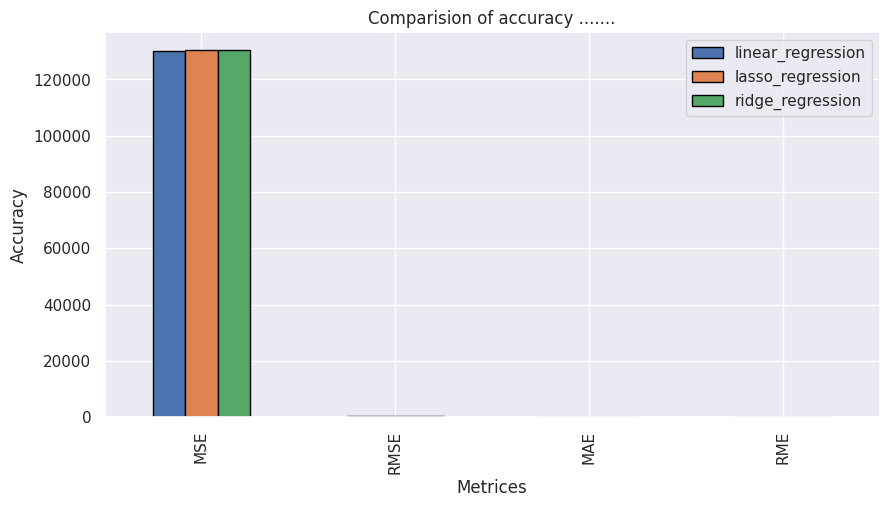

In [ ]:
df.plot(x="metrics", kind="bar", figsize=(10,5), edgecolor="black")
plt.title("Comparision of accuracy .......")
plt.xlabel("Metrices")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#basically the MSE value are too big so create a chart without use MSE
data = {
    "metrics": [ "RMSE", "MAE", "RME"],
    "linear_regression" : [rmse_lr, mae_lr, rme_lr],
    "lasso_regression" : [rmse_lasso, mae_lasso, rme_lasso],
    "ridge_regression" : [rmse_ridge, mae_ridge, rme_ridge]
}

In [ ]:
df1=pd.DataFrame(data)

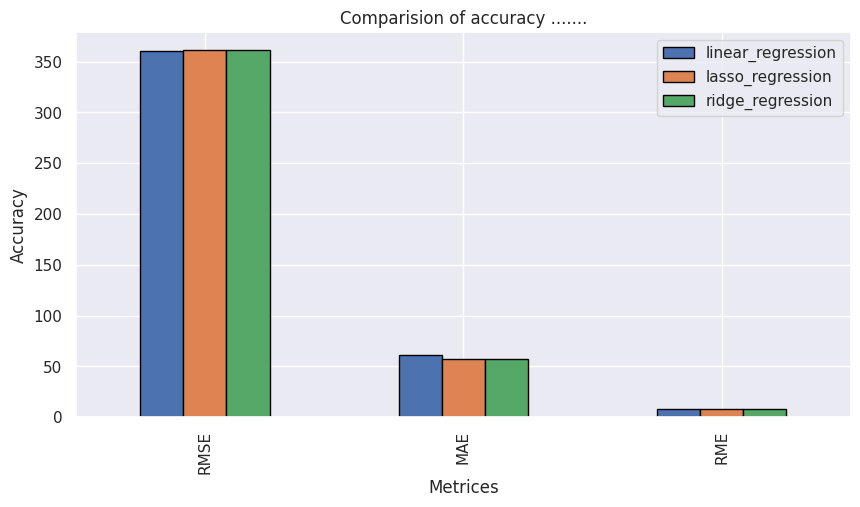

In [ ]:
df1.plot(x="metrics", kind="bar", figsize=(10,5), edgecolor="black")
plt.title("Comparision of accuracy .......")
plt.xlabel("Metrices")
plt.ylabel("Accuracy")
plt.show()